<a href="https://colab.research.google.com/github/Ashong-Nartey/Data-Mining/blob/main/Superpixel_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generating Super pixels

In [1]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import color
from skimage import morphology
from skimage import io
import matplotlib.pyplot as plt

In [2]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required = True, help = "Path to the image")
# args = vars(ap.parse_args())

# # load the image and convert it to a floating point data type

image = img_as_float(io.imread('/content/pavia.png'))
lum = color.rgb2gray(image)
mask = morphology.remove_small_holes(
    morphology.remove_small_objects(
        lum < 0.7, 500),
    500)

mask = morphology.opening(mask, morphology.disk(3))

In [3]:
# loop over the number of segments
for numSegments in (50, 200, 250):
	# apply SLIC and extract (approximately) the supplied number
	# of segments
  segments = slic(image, n_segments = numSegments, sigma = 1)
  mask_slic = slic(image, n_segments=numSegments, mask=mask, sigma = 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  """


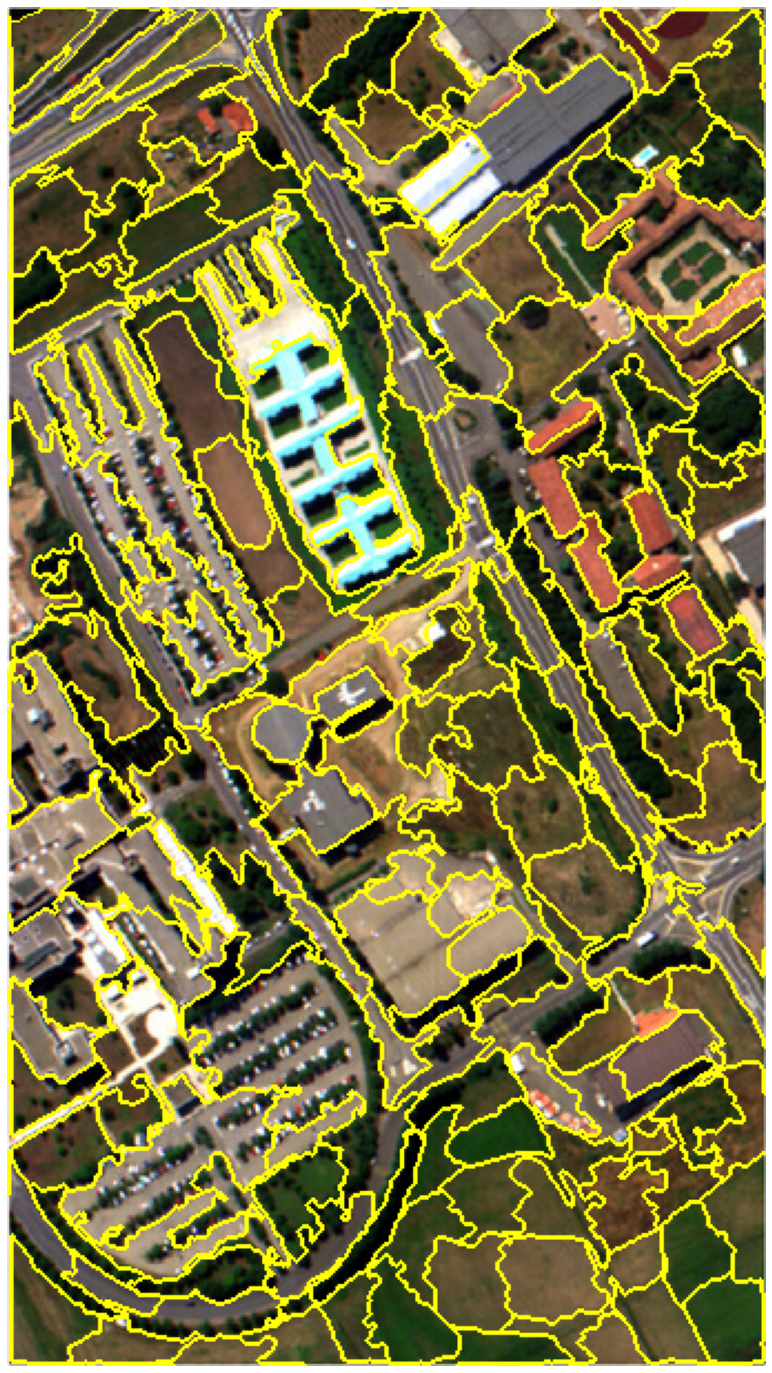

In [4]:
# show the output of SLIC
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(image)
ax.imshow(mark_boundaries(image, segments))
plt.axis("off")
plt.savefig('/content/superpix.png')
# show the plots
plt.show()


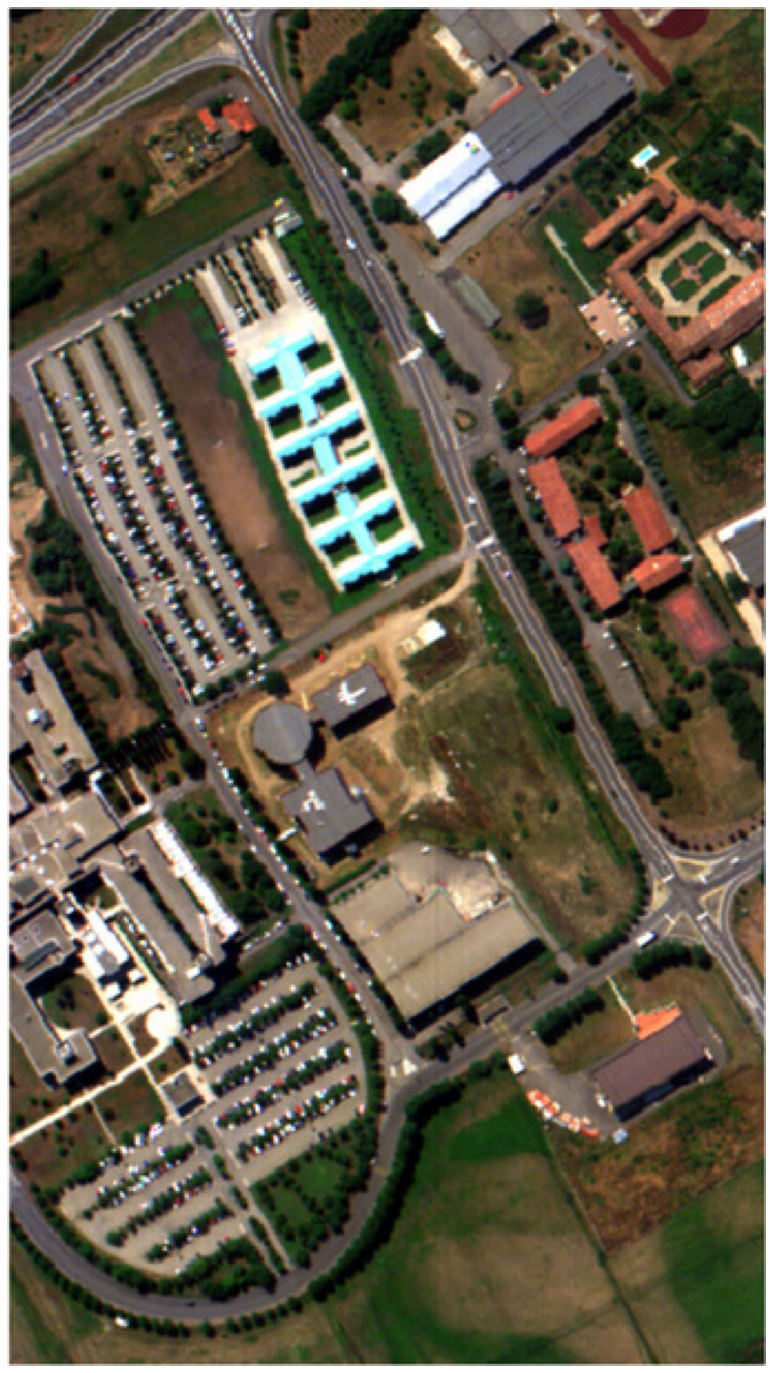

In [5]:
# show the plots
fig = plt.figure("Superpixels -- %d segments" % (numSegments), figsize=(25,25))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(image)
#ax.imshow(mark_boundaries(image, segments))
plt.axis("off")
plt.savefig('/content/original.png')
# show the plots
plt.show()

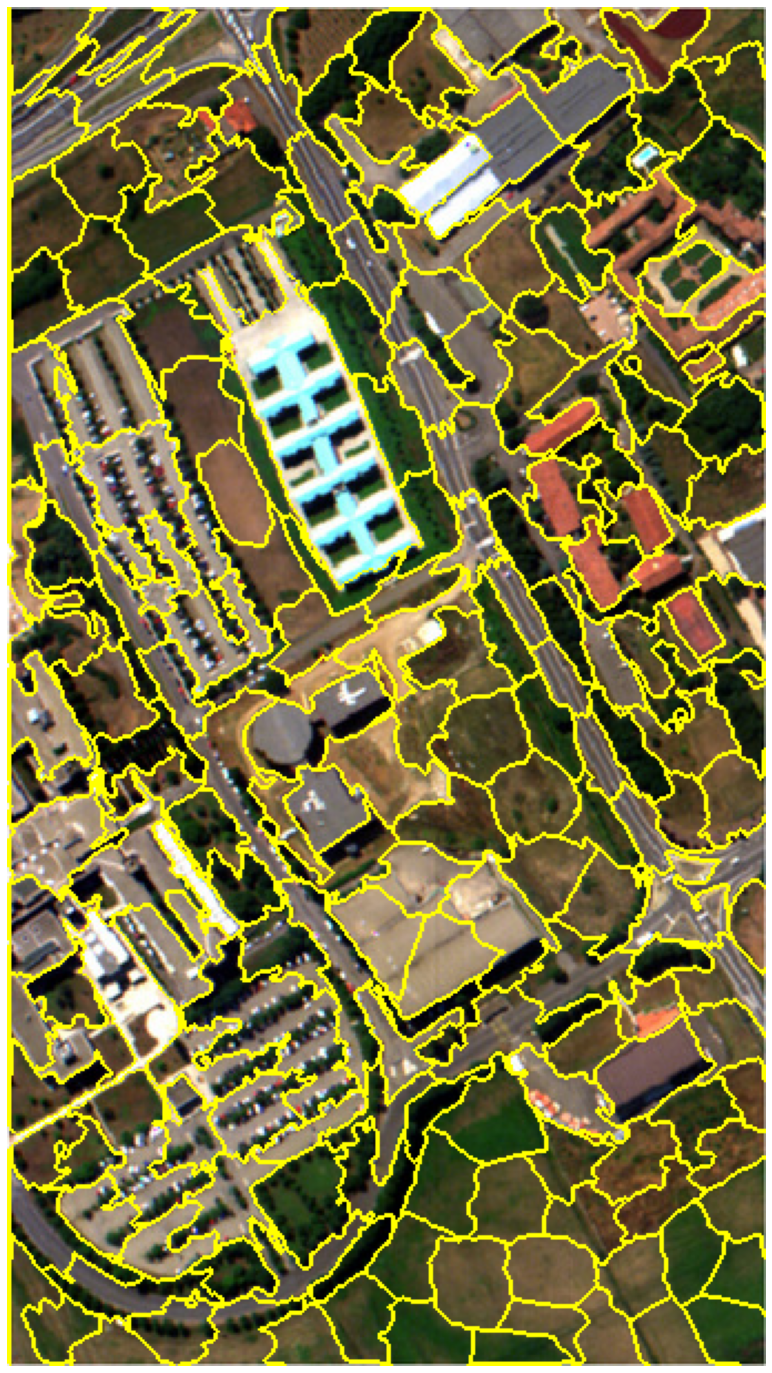

In [7]:
# show the plots
fig = plt.figure("Superpixels -- %d segments" % (numSegments), figsize=(25,25))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(segments)
ax.imshow(mark_boundaries(image, mask_slic))
plt.axis("off")
plt.savefig('/content/adj_mask.png')
# show the plots
plt.show()